#### 1. Import package

In [1]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt

#### 2. Exploração inicial de dados.

In [2]:
# Import dataset
df = pd.read_excel('../data/raw/dados_anonimizados_revisado.xlsx')

In [3]:
# Colunas
print(df.columns)

# Types nas colunas
print(df.dtypes)

df.head()

Index(['id_paciente', 'idade', 'sexo', 'peso', 'altura', 'Sequencia_exame',
       'data_inicio', 'data_termino', 'ido', 'fcminima', 'fcmedia', 'fcmaxima',
       'bpm1', 'bpm2', 'bpm3', 'bpm4', 'bpm5', 'bpm6', 'bpm7', 'bpm8', 'bpm9',
       'bpm10', 'bpm11', 'bpm12', 'bpm13', 'bpm14', 'bpm15'],
      dtype='object')
id_paciente          int64
idade                int64
sexo                object
peso                 int64
altura               int64
Sequencia_exame      int64
data_inicio         object
data_termino        object
ido                float64
fcminima             int64
fcmedia              int64
fcmaxima             int64
bpm1                object
bpm2                object
bpm3                object
bpm4                object
bpm5                object
bpm6                object
bpm7                object
bpm8                object
bpm9                object
bpm10               object
bpm11               object
bpm12               object
bpm13               object
bpm14 

,id_paciente,idade,sexo,peso,altura,Sequencia_exame,data_inicio,data_termino,ido,fcminima,...,bpm6,bpm7,bpm8,bpm9,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15
0,244,49,f,70,158,1,2020-06-16 22:52:15,2020-06-17 06:44:51,6.6,53,...,0%,24%,66%,8%,1%,0%,0%,0%,0%,0%
1,244,49,f,70,158,2,2020-06-17 22:43:42,2020-06-18 06:40:30,5.2,57,...,0%,16%,57%,24%,2%,1%,0%,0%,0%,0%
2,244,49,f,70,158,3,2020-07-01 23:38:52,2020-07-02 06:27:26,6.8,55,...,1%,20%,47%,29%,3%,0%,0%,0%,0%,0%
3,244,49,f,68,158,4,2020-10-06 22:27:13,2020-10-07 05:24:49,8.9,60,...,0%,6%,55%,37%,1%,0%,0%,0%,0%,0%
4,244,50,f,70,158,5,2021-03-30 23:03:35,2021-03-31 06:03:49,3.4,57,...,0%,34%,59%,6%,0%,0%,0%,0%,0%,0%


In [4]:
# Correção de tipos

bpms = ['bpm1', 'bpm2', 'bpm3', 'bpm4', 'bpm5', 'bpm6', 'bpm7', 'bpm8', 
        'bpm9', 'bpm10', 'bpm11', 'bpm12', 'bpm13', 'bpm14', 'bpm15']

df['data_inicio'] = pd.to_datetime(df['data_inicio'], format='%Y-%m-%d %H:%M:%S')
df['data_termino'] = pd.to_datetime(df['data_termino'], format='%Y-%m-%d %H:%M:%S')
df['sexo'] = df['sexo'].astype('string')

for bpm in bpms:
    df[bpm] = df[bpm].str.replace(" ", "")
    df[bpm] = df[bpm].str.strip()
    df[bpm] = df[bpm].str.rstrip("%").astype(float)/100
    
df.replace(0.0, np.nan, inplace=True)

print(df.dtypes)

id_paciente                 int64
idade                       int64
sexo                       string
peso                        int64
altura                      int64
Sequencia_exame             int64
data_inicio        datetime64[ns]
data_termino       datetime64[ns]
ido                       float64
fcminima                    int64
fcmedia                     int64
fcmaxima                    int64
bpm1                      float64
bpm2                      float64
bpm3                      float64
bpm4                      float64
bpm5                      float64
bpm6                      float64
bpm7                      float64
bpm8                      float64
bpm9                      float64
bpm10                     float64
bpm11                     float64
bpm12                     float64
bpm13                     float64
bpm14                     float64
bpm15                     float64
dtype: object


In [5]:
print(df.isnull().sum())
df.head(10)

id_paciente          0
idade                0
sexo                 0
peso                 0
altura               0
Sequencia_exame      0
data_inicio          0
data_termino         0
ido                  1
fcminima             0
fcmedia              0
fcmaxima             0
bpm1               570
bpm2               570
bpm3               570
bpm4               563
bpm5               443
bpm6               148
bpm7                23
bpm8                19
bpm9               136
bpm10              354
bpm11              504
bpm12              565
bpm13              570
bpm14              570
bpm15              570
dtype: int64


,id_paciente,idade,sexo,peso,altura,Sequencia_exame,data_inicio,data_termino,ido,fcminima,...,bpm6,bpm7,bpm8,bpm9,bpm10,bpm11,bpm12,bpm13,bpm14,bpm15
0,244,49,f,70,158,1,2020-06-16 22:52:15,2020-06-17 06:44:51,6.6,53,...,NaN,0.24,0.66,0.08,0.01,NaN,NaN,NaN,NaN,NaN
1,244,49,f,70,158,2,2020-06-17 22:43:42,2020-06-18 06:40:30,5.2,57,...,NaN,0.16,0.57,0.24,0.02,0.01,NaN,NaN,NaN,NaN
2,244,49,f,70,158,3,2020-07-01 23:38:52,2020-07-02 06:27:26,6.8,55,...,0.01,0.20,0.47,0.29,0.03,NaN,NaN,NaN,NaN,NaN
3,244,49,f,68,158,4,2020-10-06 22:27:13,2020-10-07 05:24:49,8.9,60,...,NaN,0.06,0.55,0.37,0.01,NaN,NaN,NaN,NaN,NaN
4,244,50,f,70,158,5,2021-03-30 23:03:35,2021-03-31 06:03:49,3.4,57,...,NaN,0.34,0.59,0.06,NaN,NaN,NaN,NaN,NaN,NaN
5,244,50,f,70,158,6,2022-02-08 22:13:41,2022-02-09 05:44:33,5.6,62,...,NaN,0.02,0.75,0.21,0.01,NaN,NaN,NaN,NaN,NaN
6,192,43,m,77,170,1,2019-12-17 00:27:35,2019-12-17 09:25:31,0.6,43,...,0.64,0.30,0.03,0.01,NaN,NaN,NaN,NaN,NaN,NaN
7,192,43,m,77,170,2,2019-12-27 00:06:22,2019-12-27 08:19:58,1.8,38,...,0.59,0.33,0.02,0.01,NaN,NaN,NaN,NaN,NaN,NaN
8,192,43,m,77,170,3,2020-02-05 23:09:52,2020-02-06 06:03:56,0.1,35,...,0.08,0.02,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,192,43,m,74,170,4,2020-06-11 00:32:50,2020-06-11 05:42:14,0.6,36,...,0.60,0.06,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Variables categoricas y numesicas
numerical = df.select_dtypes(include = [int, float]).keys().values
categorical = df.select_dtypes(exclude = [int, float, 'datetime']).keys().values
numerical, categorical

(array(['id_paciente', 'idade', 'peso', 'altura', 'Sequencia_exame', 'ido',
        'fcminima', 'fcmedia', 'fcmaxima', 'bpm1', 'bpm2', 'bpm3', 'bpm4',
        'bpm5', 'bpm6', 'bpm7', 'bpm8', 'bpm9', 'bpm10', 'bpm11', 'bpm12',
        'bpm13', 'bpm14', 'bpm15'], dtype=object),
 array(['sexo'], dtype=object))

### Graricos

array([[<Axes: title={'center': 'id_paciente'}>,
        <Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'Sequencia_exame'}>,
        <Axes: title={'center': 'ido'}>],
       [<Axes: title={'center': 'fcminima'}>,
        <Axes: title={'center': 'fcmedia'}>,
        <Axes: title={'center': 'fcmaxima'}>,
        <Axes: title={'center': 'bpm1'}>,
        <Axes: title={'center': 'bpm2'}>,
        <Axes: title={'center': 'bpm3'}>],
       [<Axes: title={'center': 'bpm4'}>,
        <Axes: title={'center': 'bpm5'}>,
        <Axes: title={'center': 'bpm6'}>,
        <Axes: title={'center': 'bpm7'}>,
        <Axes: title={'center': 'bpm8'}>,
        <Axes: title={'center': 'bpm9'}>],
       [<Axes: title={'center': 'bpm10'}>,
        <Axes: title={'center': 'bpm11'}>,
        <Axes: title={'center': 'bpm12'}>,
        <Axes: title={'center': 'bpm13'}>,
        <Axes: title={'center': 'bpm14

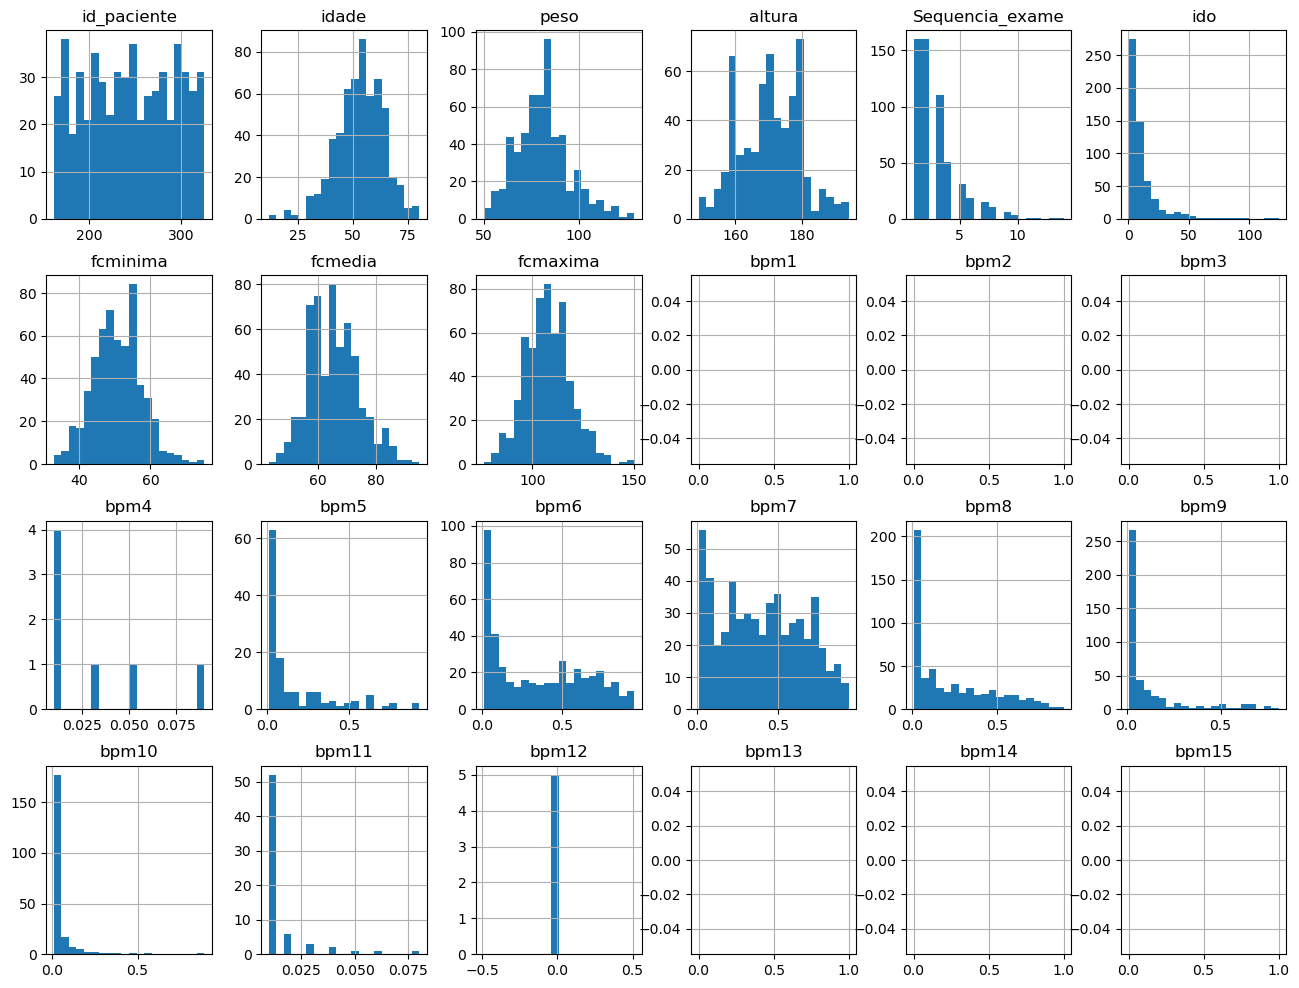

In [7]:
pd.options.plotting.backend = "matplotlib"
df[numerical].hist(bins=20, figsize=(16, 12), layout=(4, 6))

#### Pergunta:
São necesarias tudas as colunas?

In [8]:
df['id_paciente'].unique()

array([244, 192, 247, 210, 196, 193, 297, 304, 310, 252, 221, 305, 280,
       215, 268, 216, 198, 240, 167, 287, 259, 298, 261, 211, 276, 199,
       213, 284, 242, 181, 204, 316, 214, 256, 227, 313, 299, 169, 174,
       312, 245, 255, 293, 188, 222, 248, 314, 302, 230, 295, 282, 239,
       225, 218, 307, 212, 292, 197, 285, 272, 209, 170, 322, 325, 233,
       232, 163, 208, 264, 275, 286, 183, 246, 226, 289, 185, 168, 234,
       279, 320, 311, 249, 303, 165, 190, 236, 291, 162, 171, 219, 315,
       260, 224, 274, 294, 166, 250, 238, 206, 223, 309, 323, 273, 253,
       262, 271, 296, 319, 231, 229, 318, 164, 194, 263, 277, 173, 235,
       220, 258, 321, 203, 176, 308, 283, 290, 254, 177, 179, 270, 317,
       281, 266, 306, 217, 180, 205, 257, 288, 324, 202, 243, 178, 301,
       182, 187, 200, 251, 300, 278, 184, 195, 241, 191, 237, 228, 269,
       201, 172, 207, 265, 175])

In [9]:
columns = list(df.keys())
for i in bpms:
    columns.remove(i)
columns

['id_paciente',
 'idade',
 'sexo',
 'peso',
 'altura',
 'Sequencia_exame',
 'data_inicio',
 'data_termino',
 'ido',
 'fcminima',
 'fcmedia',
 'fcmaxima']

In [23]:
pd.options.plotting.backend = "plotly"

# fig = px.histogram(df, x="ido", y="idade", color="sexo", marginal="box", hover_data=df.columns)
fig = px.histogram(df, x="ido", color="sexo", marginal="box", hover_data=df.columns)

fig.show()

fig = px.histogram(df, x="ido", y="peso", color="sexo", marginal="box", hover_data=df.columns)
fig.show()

fig = px.histogram(df, x="ido", y="altura", color="sexo", marginal="box", hover_data=df.columns)
fig.show()

In [21]:
np.random.randn(200)

array([-8.17621515e-01,  1.52503630e+00, -8.13274520e-01, -4.65650651e-02,
        8.92064353e-01,  1.97609429e+00, -1.34564947e+00, -8.14083762e-01,
        3.87796992e-01,  5.91401961e-02,  1.68933407e+00, -1.36968517e+00,
        1.00748730e+00,  1.19778666e+00,  1.86565281e+00,  1.05985023e-01,
        1.20701764e+00, -1.67955654e+00, -2.25666920e-01,  3.70747808e-01,
       -2.40181431e-01,  1.77695308e-01, -1.61673130e-01,  1.20037087e+00,
        3.91040209e-01,  2.90781720e-01, -2.23128489e+00, -2.79240152e-01,
        5.39118204e-01, -1.08769155e+00, -5.53055022e-01, -5.21885705e-02,
        8.34980260e-01,  1.04680081e+00, -6.66781060e-01,  6.62246507e-01,
        1.50394689e+00, -6.44720549e-01, -6.35411520e-01, -4.13574350e-02,
        4.58508422e-01,  2.25574264e-01, -1.47504055e-02,  2.27014110e-01,
        4.54705301e-01, -8.30053319e-01, -4.07575860e-01, -1.54020597e+00,
       -9.43042050e-01, -1.15160466e+00,  1.57743637e+00,  4.85219969e-01,
        7.74129089e-01, -

In [103]:
px.data.tips()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
